In [1]:

import torch
from torch import nn
from torch import optim

from torchsummary import summary
import imageVisualizationHelper 
from dilationNeuralNetwork import DilationNeuralNetwork
import commonHelper
import trainLoopHelper
import testLoopHelper
import datasetProvider

In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
image_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = commonHelper.get_device(use_seed=True)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


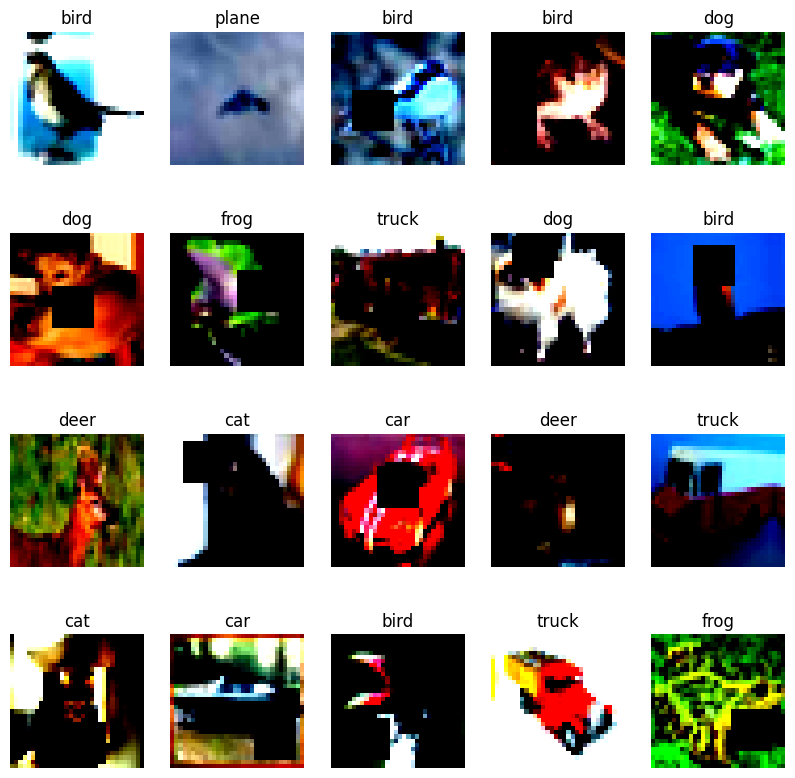

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TEST data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


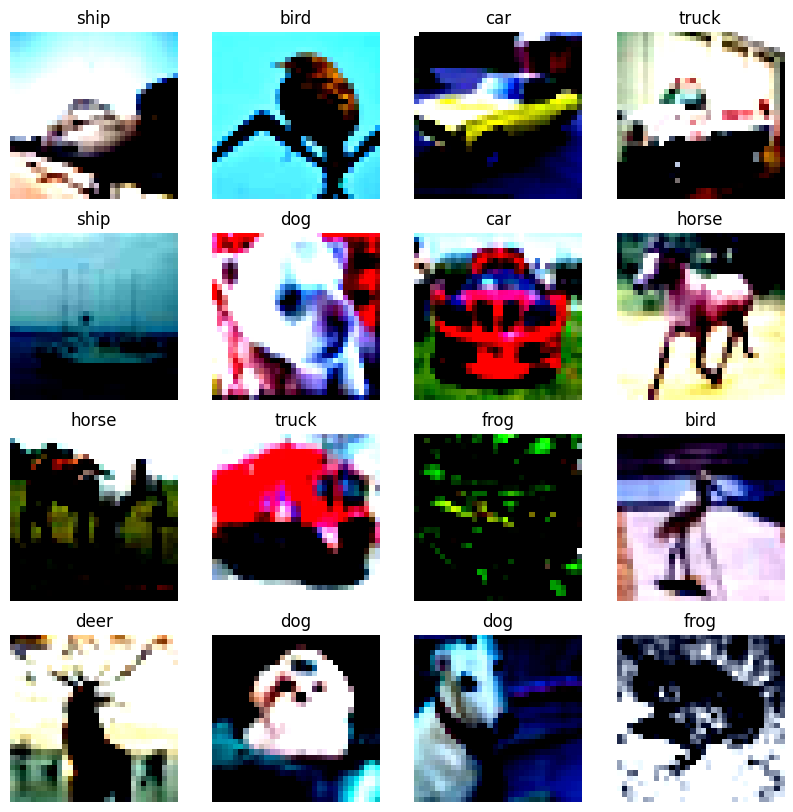

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


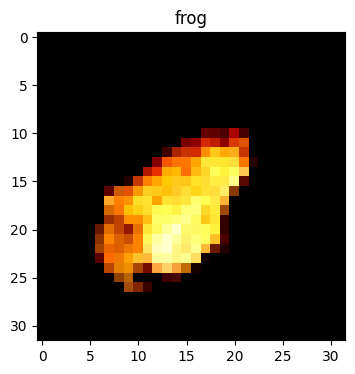

In [3]:

# Download training data from open datasets.

train_transforms_collection = []
train_transforms_collection.append(datasetProvider.create_flip_transformation(is_horizontal=True))
train_transforms_collection.append(datasetProvider.create_shift_scale_rotate_transform(shift_limit=0.1, scale_limit=0.1, rotate_limit=10))
train_transforms_collection.append(datasetProvider.create_random_crop_transformation(max_height=10, max_width=10, fill_value=[0,0,0]))
train_transforms_collection.extend(datasetProvider.create_basic_transforms_collection())

train_transforms = datasetProvider.compose_custom_transforms(train_transforms_collection)
test_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())

train_dataset, test_dataset = datasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


print("---->TEST data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(test_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [4]:

BATCH_SIZE = 256
train_dataloader, test_dataloader = datasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([256, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([256]) torch.int64
Labels for a batch of size 256 are tensor([2, 3, 4, 6, 0, 0, 5, 6, 5, 4, 2, 4, 5, 5, 5, 6, 0, 8, 9, 3, 0, 6, 1, 9,
        8, 7, 5, 6, 3, 3, 5, 9, 0, 5, 1, 6, 1, 3, 0, 4, 3, 2, 5, 9, 7, 4, 2, 4,
        8, 1, 1, 3, 8, 4, 1, 7, 4, 3, 2, 5, 0, 5, 6, 3, 7, 9, 9, 0, 2, 7, 8, 4,
        1, 2, 0, 2, 5, 3, 7, 1, 5, 8, 6, 8, 4, 0, 0, 8, 4, 3, 5, 6, 3, 9, 3, 6,
        5, 6, 3, 8, 2, 2, 4, 6, 3, 8, 6, 0, 9, 6, 5, 4, 6, 7, 1, 7, 7, 2, 3, 5,
        8, 4, 0, 5, 9, 5, 4, 7, 6, 1, 5, 5, 1, 0, 7, 3, 1, 3, 3, 9, 7, 1, 4, 0,
        9, 0, 1, 7, 6, 2, 8, 9, 3, 7, 3, 4, 7, 3, 7, 3, 4, 6, 3, 7, 1, 3, 8, 7,
        1, 0, 3, 0, 7, 1, 5, 3, 5, 0, 2, 6, 6, 6, 7, 1, 4, 9, 3, 2, 8, 9, 5, 6,
        0, 2, 4, 2, 0, 2, 6, 1, 6, 3, 4, 6, 1, 2, 8, 6, 0, 3, 2, 7, 3, 7, 5, 7,
        9, 1, 9, 8, 6, 6, 9, 1, 9, 1, 3, 1, 5, 6, 0, 7, 9, 9, 0, 4, 9, 9, 2, 0,
        9, 3

In [5]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = DilationNeuralNetwork(drop_out=0.1).to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,728
              ReLU-2           [-1, 64, 30, 30]               0
       BatchNorm2d-3           [-1, 64, 30, 30]             128
           Dropout-4           [-1, 64, 30, 30]               0
            Conv2d-5           [-1, 64, 30, 30]          36,864
              ReLU-6           [-1, 64, 30, 30]               0
       BatchNorm2d-7           [-1, 64, 30, 30]             128
           Dropout-8           [-1, 64, 30, 30]               0
            Conv2d-9           [-1, 64, 15, 15]          36,864
             ReLU-10           [-1, 64, 15, 15]               0
      BatchNorm2d-11           [-1, 64, 15, 15]             128
          Dropout-12           [-1, 64, 15, 15]               0
       BasicBlock-13           [-1, 64, 15, 15]               0
           Conv2d-14           [-1, 32,

In [6]:
def get_correct_prediction_count(predictions : torch.Tensor, valid_labels):
  # torch.argmax locates the indices of the maximum elements within a tensor.
  # It does this along a specified dimension (axis).
  return predictions.argmax(dim=1).eq(valid_labels).sum().item()

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

MAX_IMAGES_FOR_DISPLAY = 20

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [8]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [9]:


def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


In [10]:
LEARNING_RATE = 0.09
EPOCHS = 30
MOMENTUM = 0.85

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    scheduler.step()

print("Done!")

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


  0%|          | 0/196 [00:00<?, ?it/s]

Train loop parameters shapes
 Shape of data : torch.Size([256, 3, 32, 32]), label: torch.Size([256])
Shape of predicted data : torch.Size([256, 10])


Train: Loss=2.3578 Batch_id=2 Accuracy=10.55:   1%|          | 2/196 [00:20<27:58,  8.65s/it]  

labels : tensor([2, 7, 7, 3, 4, 4, 0, 9, 0, 4, 7, 6, 5, 6, 8, 2, 0, 4, 5, 2, 0, 2, 7, 3,
        0, 3, 1, 6, 8, 3, 8, 6, 6, 3, 0, 7, 2, 0, 9, 4, 2, 0, 5, 9, 0, 1, 8, 1,
        6, 9, 3, 5, 1, 0, 1, 0, 7, 7, 4, 9, 8, 9, 8, 0, 3, 7, 6, 4, 6, 0, 1, 5,
        1, 2, 3, 0, 0, 0, 5, 3, 4, 2, 0, 8, 8, 0, 3, 0, 8, 3, 3, 7, 4, 2, 6, 5,
        8, 4, 1, 2, 2, 0, 9, 7, 6, 5, 0, 3, 1, 3, 3, 5, 7, 3, 0, 4, 5, 0, 2, 9,
        7, 2, 2, 0, 2, 8, 8, 3, 7, 5, 0, 9, 8, 1, 4, 0, 1, 7, 8, 1, 4, 0, 3, 6,
        4, 6, 2, 0, 3, 1, 1, 0, 4, 6, 0, 7, 0, 7, 1, 9, 6, 9, 7, 9, 4, 5, 4, 2,
        0, 7, 0, 2, 5, 2, 2, 8, 6, 4, 4, 9, 5, 1, 8, 1, 3, 3, 3, 5, 4, 0, 5, 6,
        6, 1, 7, 9, 2, 6, 0, 1, 9, 1, 2, 7, 7, 7, 5, 2, 4, 4, 0, 2, 5, 7, 2, 3,
        6, 5, 9, 7, 2, 3, 3, 3, 3, 7, 8, 9, 2, 3, 0, 9, 6, 1, 2, 8, 1, 1, 2, 5,
        1, 4, 7, 5, 1, 4, 9, 7, 6, 1, 9, 6, 6, 4, 3, 6], device='cuda:0')
-----------------------------------------------------
argmax_data : tensor([4, 2, 2, 3, 4, 2, 2, 4, 4, 3, 2, 4, 2, 3,

Train: Loss=1.4307 Batch_id=195 Accuracy=28.34: 100%|██████████| 196/196 [00:29<00:00,  6.71it/s]


Test loop parameters shapes
 Shape of data : torch.Size([256, 3, 32, 32]), label: torch.Size([256])
Shape of predicted data : torch.Size([256, 10])
labels : tensor([2, 9, 6, 0, 4, 9, 0, 8, 7, 3, 5, 3, 1, 8, 0, 3, 6, 0, 9, 8, 5, 3, 4, 3,
        0, 7, 0, 8, 5, 9, 2, 7, 8, 5, 7, 2, 1, 9, 2, 8, 4, 8, 3, 9, 4, 2, 2, 2,
        7, 1, 9, 2, 9, 7, 9, 9, 1, 1, 5, 2, 6, 6, 1, 3, 6, 3, 9, 4, 9, 6, 8, 0,
        2, 1, 4, 4, 4, 7, 6, 9, 3, 7, 3, 7, 3, 1, 3, 3, 6, 2, 2, 3, 0, 6, 0, 4,
        9, 8, 4, 9, 1, 9, 9, 2, 0, 4, 5, 1, 1, 0, 1, 0, 4, 6, 6, 9, 3, 5, 7, 2,
        5, 5, 7, 7, 1, 8, 8, 1, 5, 2, 5, 5, 9, 5, 4, 9, 5, 8, 6, 3, 8, 0, 6, 4,
        7, 1, 6, 6, 4, 2, 4, 5, 3, 3, 9, 2, 0, 9, 9, 5, 4, 9, 1, 0, 3, 9, 2, 3,
        8, 3, 8, 2, 5, 9, 4, 2, 9, 2, 0, 1, 2, 0, 9, 9, 5, 8, 2, 3, 5, 7, 9, 3,
        9, 8, 6, 9, 7, 9, 2, 7, 1, 7, 4, 3, 6, 6, 9, 9, 9, 8, 7, 6, 2, 5, 2, 8,
        9, 1, 9, 3, 9, 7, 7, 9, 4, 1, 9, 8, 6, 1, 2, 5, 2, 0, 8, 5, 6, 7, 8, 3,
        8, 3, 5, 8, 7, 1, 1, 9, 6, 9, 0, 5,

Train: Loss=1.3952 Batch_id=195 Accuracy=43.33: 100%|██████████| 196/196 [00:30<00:00,  6.43it/s]


Test set: Average loss: 61.4709, Accuracy: 4577/10000 (45.77%)

Epoch 3


Train: Loss=1.2323 Batch_id=195 Accuracy=51.04: 100%|██████████| 196/196 [00:28<00:00,  6.77it/s]


Test set: Average loss: 52.5311, Accuracy: 5499/10000 (54.99%)

Epoch 4


Train: Loss=1.0184 Batch_id=195 Accuracy=56.88: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]


Test set: Average loss: 43.0142, Accuracy: 6168/10000 (61.68%)

Epoch 5


Train: Loss=0.9632 Batch_id=195 Accuracy=61.16: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]


Test set: Average loss: 38.9101, Accuracy: 6543/10000 (65.43%)

Epoch 6


Train: Loss=0.7674 Batch_id=195 Accuracy=65.07: 100%|██████████| 196/196 [00:30<00:00,  6.43it/s]


Test set: Average loss: 35.7800, Accuracy: 6943/10000 (69.43%)

Epoch 7


Train: Loss=0.7831 Batch_id=195 Accuracy=67.21: 100%|██████████| 196/196 [00:32<00:00,  6.06it/s]


Test set: Average loss: 34.0066, Accuracy: 7067/10000 (70.67%)

Epoch 8


Train: Loss=0.9142 Batch_id=195 Accuracy=69.73: 100%|██████████| 196/196 [00:32<00:00,  6.00it/s]


Test set: Average loss: 31.3194, Accuracy: 7365/10000 (73.65%)

Epoch 9


Train: Loss=1.0619 Batch_id=195 Accuracy=71.08: 100%|██████████| 196/196 [00:28<00:00,  6.97it/s]


Test set: Average loss: 28.2787, Accuracy: 7583/10000 (75.83%)

Epoch 10


Train: Loss=0.6951 Batch_id=195 Accuracy=72.36: 100%|██████████| 196/196 [00:27<00:00,  7.19it/s]


Test set: Average loss: 28.0073, Accuracy: 7637/10000 (76.37%)

Epoch 11


Train: Loss=0.7447 Batch_id=195 Accuracy=74.26: 100%|██████████| 196/196 [00:27<00:00,  7.11it/s]


Test set: Average loss: 25.3127, Accuracy: 7889/10000 (78.89%)

Epoch 12


Train: Loss=0.6868 Batch_id=195 Accuracy=75.45: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


Test set: Average loss: 25.3500, Accuracy: 7907/10000 (79.07%)

Epoch 13


Train: Loss=0.8302 Batch_id=195 Accuracy=76.28: 100%|██████████| 196/196 [00:27<00:00,  7.16it/s]


Test set: Average loss: 23.8957, Accuracy: 7977/10000 (79.77%)

Epoch 14


Train: Loss=0.5714 Batch_id=195 Accuracy=76.86: 100%|██████████| 196/196 [00:27<00:00,  7.11it/s]


Test set: Average loss: 23.6456, Accuracy: 8011/10000 (80.11%)

Epoch 15


Train: Loss=0.6684 Batch_id=195 Accuracy=77.57: 100%|██████████| 196/196 [00:27<00:00,  7.10it/s]


Test set: Average loss: 22.8477, Accuracy: 8153/10000 (81.53%)

Epoch 16


Train: Loss=0.6473 Batch_id=195 Accuracy=78.63: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


Test set: Average loss: 21.9454, Accuracy: 8138/10000 (81.38%)

Epoch 17


Train: Loss=0.6136 Batch_id=195 Accuracy=79.13: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


Test set: Average loss: 21.1075, Accuracy: 8234/10000 (82.34%)

Epoch 18


Train: Loss=0.7425 Batch_id=195 Accuracy=79.49: 100%|██████████| 196/196 [00:28<00:00,  6.86it/s]


Test set: Average loss: 21.4633, Accuracy: 8267/10000 (82.67%)

Epoch 19


Train: Loss=0.8044 Batch_id=195 Accuracy=79.89: 100%|██████████| 196/196 [00:27<00:00,  7.13it/s]


Test set: Average loss: 21.2572, Accuracy: 8244/10000 (82.44%)

Epoch 20


Train: Loss=0.6363 Batch_id=195 Accuracy=80.24: 100%|██████████| 196/196 [00:27<00:00,  7.23it/s]


Test set: Average loss: 20.0005, Accuracy: 8344/10000 (83.44%)

Epoch 21


Train: Loss=0.5044 Batch_id=195 Accuracy=80.89: 100%|██████████| 196/196 [00:27<00:00,  7.08it/s]


Test set: Average loss: 19.4744, Accuracy: 8384/10000 (83.84%)

Epoch 22


Train: Loss=0.6431 Batch_id=195 Accuracy=81.30: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]


Test set: Average loss: 19.3442, Accuracy: 8383/10000 (83.83%)

Epoch 23


Train: Loss=0.4924 Batch_id=195 Accuracy=81.62: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]


Test set: Average loss: 18.5133, Accuracy: 8444/10000 (84.44%)

Epoch 24


Train: Loss=0.4713 Batch_id=195 Accuracy=81.98: 100%|██████████| 196/196 [00:27<00:00,  7.20it/s]


Test set: Average loss: 18.8485, Accuracy: 8423/10000 (84.23%)

Epoch 25


Train: Loss=0.6686 Batch_id=195 Accuracy=82.02: 100%|██████████| 196/196 [00:27<00:00,  7.17it/s]


Test set: Average loss: 17.8857, Accuracy: 8445/10000 (84.45%)

Epoch 26


Train: Loss=0.4218 Batch_id=195 Accuracy=82.59: 100%|██████████| 196/196 [00:27<00:00,  7.17it/s]


Test set: Average loss: 18.2537, Accuracy: 8481/10000 (84.81%)

Epoch 27


Train: Loss=0.5848 Batch_id=195 Accuracy=83.09: 100%|██████████| 196/196 [00:27<00:00,  7.15it/s]


Test set: Average loss: 18.1640, Accuracy: 8468/10000 (84.68%)

Epoch 28


Train: Loss=0.4910 Batch_id=195 Accuracy=82.95: 100%|██████████| 196/196 [00:28<00:00,  6.80it/s]


Test set: Average loss: 17.3792, Accuracy: 8544/10000 (85.44%)

Epoch 29


Train: Loss=0.4643 Batch_id=195 Accuracy=83.29: 100%|██████████| 196/196 [00:29<00:00,  6.58it/s]


Test set: Average loss: 17.7247, Accuracy: 8532/10000 (85.32%)

Epoch 30


Train: Loss=0.5145 Batch_id=195 Accuracy=83.66: 100%|██████████| 196/196 [00:29<00:00,  6.55it/s]


Test set: Average loss: 17.6474, Accuracy: 8526/10000 (85.26%)

Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Wrongly predicted test images: 20


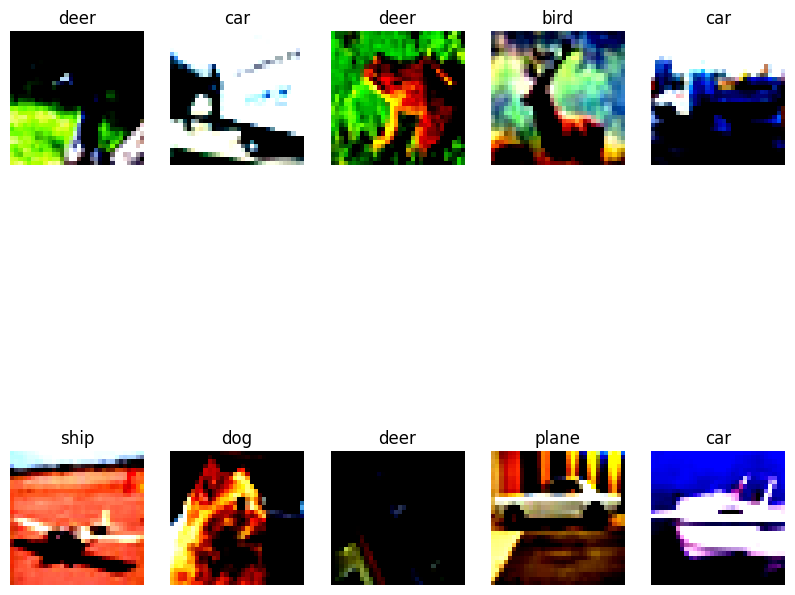

In [11]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


# print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
